In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LinearSegmentedColormap
from perlin import perlin

## Generate Perlin noise

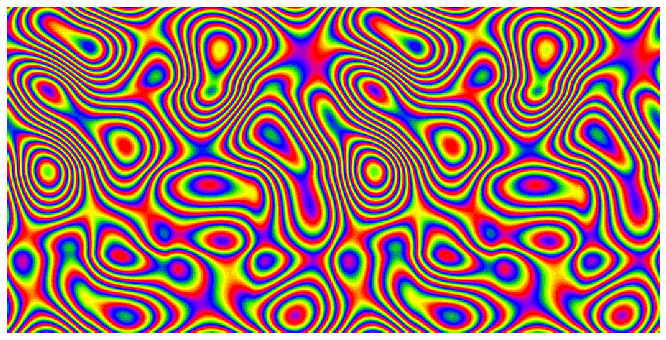

In [2]:
# Set grid shape for randomly seeded gradients
shape = (4,4)

# Set density - output shape will be dens * shape = (128,128)
dens = 32

# Generate noise
x = perlin(shape, dens=dens, seed=0)

# Test that noise tiles seamlessly
x = np.concatenate([x] * 2, axis=1)

plt.figure(figsize=(12,6))
plt.imshow(x, cmap=plt.get_cmap('prism'))
plt.axis('off')
plt.show()


## Generate domain warping

Add noise to grid coordinates and generate noise again

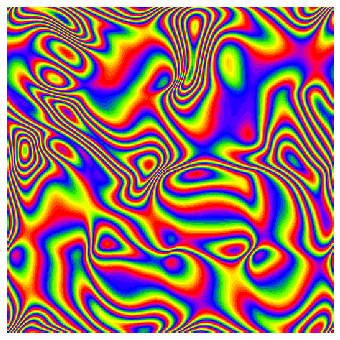

In [3]:
dens = 32
shape = (4,4)
x = perlin(shape, dens=dens, seed=0, warp=True)

plt.figure(figsize=(6,6))
plt.imshow(x, cmap=plt.get_cmap('prism'))
plt.axis('off')
plt.show()


## Generate octaves

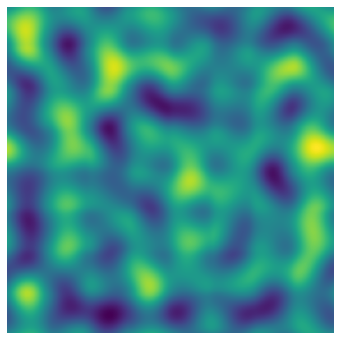

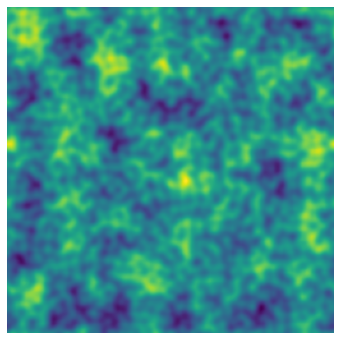

In [4]:
dens = 32
shape = (8,8)

# Generate noise
x = perlin(shape, dens=dens, seed=0)

plt.figure(figsize=(6,6))
plt.imshow(x, cmap=plt.get_cmap('viridis'))
plt.axis('off')
plt.show()

# Generate noise with 2 additional octaves
x = perlin(shape, dens=dens, seed=0, octaves=2)

plt.figure(figsize=(6,6))
plt.imshow(x, cmap=plt.get_cmap('viridis'))
plt.axis('off')
plt.show()

## Generate water caustics

Take absolute value of Perlin noise and apply log-scaled color gradient

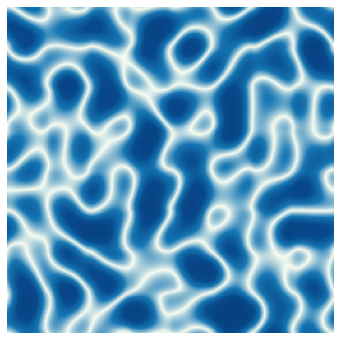

In [5]:
dens = 32
shape = (8,8)
x = perlin(shape, dens=dens)

# Take absolute value of Perlin noise
x = np.abs(x)

# Log-scale colormap
logscale = np.logspace(0,-3,5)
colors = plt.cm.get_cmap('GnBu_r')(logscale)
cmap = LinearSegmentedColormap.from_list('caustics', colors)

plt.figure(figsize=(6,6))
plt.imshow(x, cmap=cmap)
plt.axis('off')
plt.show()

## Generate flower petals

Take 1D Perlin noise as the varying radius along a circle

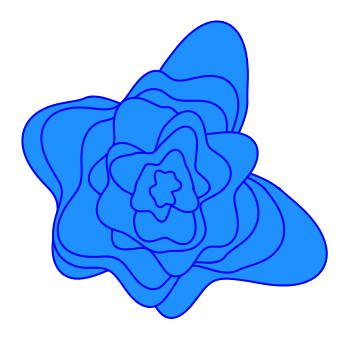

In [6]:
dens = 32
shape = (8,8)
x = perlin(shape, dens=dens)

n = 8
delta = dens
plt.figure(figsize=(6,6))
for i in range(n):
    r = x[delta * i] + 1
    r = np.concatenate([r, (r[0],)])
    phi = 2 * np.pi * np.linspace(0, 1, len(r))
    scale = 1 - i / n
    z = scale * r * np.exp(1j * phi)
    ax = plt.gca()
    zorder = max([ch.zorder for ch in ax.get_children()])
    plt.fill(z.real, z.imag, c='dodgerblue', zorder=zorder+1)
    plt.plot(z.real, z.imag, c='blue', lw=2, zorder=zorder+2)
plt.axis('off')
plt.show()

## Generate vector field

Take Perlin noise as the vector angle at each point of a grid

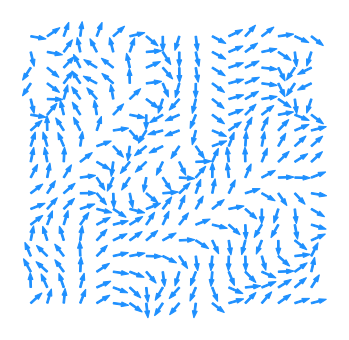

In [7]:
dens = 6
shape = (3,3)
x = perlin(shape, dens=dens)
z = np.exp(2j * np.pi * x)

shape = z.shape
plt.figure(figsize=(6,6))
for i in range(shape[0]):
    for j in range(shape[1]):
        di = 0.5 * z[i,j].real
        dj = 0.5 * z[i,j].imag
        plt.arrow(i, j, di, dj, color='dodgerblue', width=0.1)
plt.axis('off')
plt.show()

## Sound of Perlin noise

Perlin noise sounds nice and less buzzing than white noise

In [8]:
import IPython
import soundfile as sf

dens = 32
shape = (1024,)
x = perlin(shape, dens=dens, octaves=0)

sf.write('perlin.wav', x, 22050)
IPython.display.Audio('perlin.wav')